In [20]:
# Load and prepare the data
import pandas as pd
df = pd.read_csv('/content/ham-spam.csv')
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [21]:
# Check for duplicate rows
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [22]:
# Remove duplicated rows
df = df.drop_duplicates()
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [23]:
# Vectorize emails
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words ='english')
x = vectorizer.fit_transform(df['Text'])
y = df['IsSpam']

In [24]:
# Split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [25]:
# Fit the model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

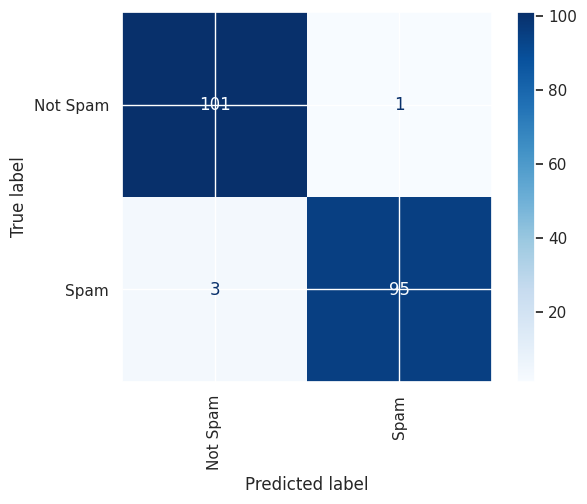

In [26]:
# show a confusion matrix
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_estimator(model, x_test, y_test,
display_labels=['Not Spam', 'Spam'],
cmap='Blues', xticks_rotation='vertical')


The model correctly identified 101 of 102 legitimate e-mails as not spam, and 95 of 98 spam e-mails as spam. Use the score method to get a rough measure of the model's accuracy

In [27]:
model.score(x_test,y_test)

0.98

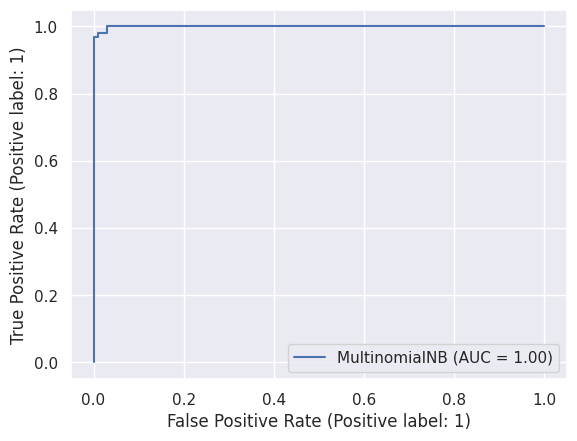

In [28]:
# visualize the ROC curve
from sklearn.metrics import RocCurveDisplay as rcd
import seaborn as sns
sns.set()
rcd.from_estimator(model, x_test, y_test)

**Use the model to classify e-mails**

In [29]:
# Prediction
msg = 'Can you attend a code review on Tuesday to make sure the logic is solid?'
input_data = vectorizer.transform([msg])
# Pass the transformed data 'input_data' to predict
model.predict(input_data)[0]

0

What is the probability that the message is not spam? We can get that by calling predict_proba, which returns an array containing two values: the probability that the predicted class is 0, and the probability that the predicted class is 1, in that order.

In [30]:
# Prediction
msg = 'Can you attend a code review on Tuesday to make sure the logic is solid?'
input_data = vectorizer.transform([msg])
# Pass the transformed data 'input_data' to predict_proba
result = model.predict_proba(input_data)[0][0]
print(result) # Print the result to see the output

0.9999497111473539


Now test the model with a spam message

In [31]:
# Prediction
msg = 'Why pay more for expensive meds when you can order them online ' \
'and save $$?'
input_data = vectorizer.transform([msg])
# Pass the transformed data 'input_data' to predict
result = model.predict(input_data)[0] # Access the first element of the 1D array
print(result) # Print the result to see the output

1


What is the probability that the message is not spam?

In [33]:
# Assuming 'input_data' is the transformed data you want to use for prediction
result = model.predict_proba(input_data)[0][0]
print(result)

0.00021423891260677753
